## Data Creation for Lab 8
Artifically created dataset based on [this example](https://paulvanderlaken.com/2017/09/27/simpsons-paradox-two-hr-examples-with-r-code/). 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import linear_model

In [39]:
Neuroticism = np.random.normal(0,1,1000)
Performance = np.random.normal(0,1,1000) + 0.3*Neuroticism 

In [3]:
def rescale_fakedata(in_data, scale_min, scale_max):
    minD = np.min(in_data)
    maxD = np.max(in_data)
    trans_m = scale_max/(maxD - minD)
    trans_b = -1*trans_m*minD
    return in_data*trans_m + trans_b

In [40]:
Neuroticism = rescale_fakedata(Neuroticism, 0, 7)
Performance = rescale_fakedata(Performance, 0, 100)

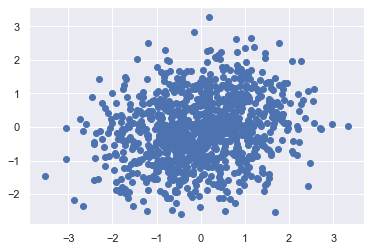

In [5]:
plt.scatter(Neuroticism,Performance)

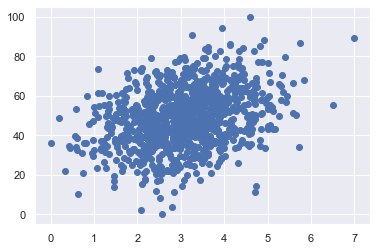

In [41]:
plt.scatter(Neuroticism,Performance)

In [42]:
meanP = np.mean(Performance)*np.ones(1000)
meanN = np.mean(Neuroticism)*np.ones(1000)

#tech = np.all([Performance > meanP],[Neuroticism > meanN])

#tech = np.any(np.all(Performance > meanP,Neuroticism > meanN), 
#                   np.all(Performance < meanP, Neuroticism < meanN))

Tech1 = Performance > meanP
Tech2 = Neuroticism > meanN
Tech3 = np.all(np.array([Tech1,Tech2]).T, axis = 1)
Tech4 = np.all(np.array([~Tech1,~Tech2]).T, axis = 1)
Tech5 = np.any(np.array([Tech3,Tech4]).T, axis = 1)
#technical = ((Performance > meanP and Neuroticism > meanN) or (Performance < meanP and Neuroticism < meanN))

In [43]:
Tech5.shape

(1000,)

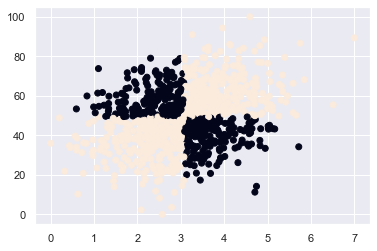

In [44]:
plt.scatter(Neuroticism,Performance, c = Tech5)

In [46]:
employees = {
    "neuroticism": Neuroticism,
    "performance": Performance
}
employ_data = pd.DataFrame(employees, columns = ["neuroticism","performance","job"])

In [47]:
employ_data.head()

,neuroticism,performance,job
0,3.199914,51.564036,NaN
1,2.030238,49.450498,NaN
2,4.269581,52.500872,NaN
3,3.025011,42.019628,NaN
4,2.661687,70.396598,NaN


In [48]:
opts = ["technical","manager"]

In [89]:
jobs = employ_data["job"]
jobs[Tech5] = np.random.choice(opts, sum(Tech5),replace=True, p = [0.8,0.2])
#= np.random.choice(opts, np.sum(Tech5), replace=True, p = [0.6,0.4])
jobs[~Tech5] = np.random.choice(opts, (1000-sum(Tech5)),replace=True, p = [0.2,0.8])

//anaconda3/envs/CSC294/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/envs/CSC294/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
employ_data["job"] = jobs

In [91]:
employ_data["job"].value_counts()

technical    567
manager      433
Name: job, dtype: int64

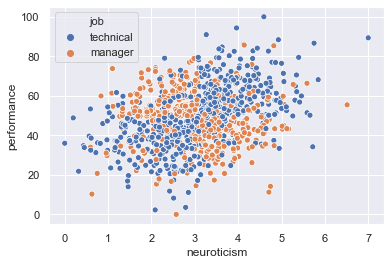

In [92]:
sea3 = sns.scatterplot(x="neuroticism", y="performance",hue ="job", data=employ_data)

In [93]:
employ_data.head()

,neuroticism,performance,job
0,3.199914,51.564036,technical
1,2.030238,49.450498,manager
2,4.269581,52.500872,technical
3,3.025011,42.019628,technical
4,2.661687,70.396598,manager


In [95]:
employ_data.to_csv("lab8data.csv", index=False)

In [108]:
employ_data.loc[employ_data["performance"] == 100]
#employ_data.loc[employ_data["neuroticism"] == 7]

,neuroticism,performance,job
791,4.593003,100.0,technical


#### Resources Consulted
0. [normal helpfile in numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html)
1. [choice in numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)
2. [Pandas DataFrame: replace all values in a column, based on condition](https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition)
3. [Selecting Subsets of Data in Pandas: Part 2](https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-2)
4. [all in numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.all.html#numpy.all)
5. [any in numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html)